# BATUHAN DEDEOĞLU

## Calculating the output in DZD systems given the difference equation
### Calculating the output sign without using defined commands

In [13]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [14]:
# x ve y nin ilk elemanları 0 çünkü ön koşul olarak y[-1]=x[-1]=0 diyoruz
x=[0,1,-1,0,0]
y=[0] 

In [15]:
#döngünün 1 den başlamasının nedeni x'in 1. değeri aslında indis vektöründe n=0 a denk gelmekte
for i in range (1,len(x)):
    y.append (-0.5*y[i-1]+x[i]+2*x[i-1])
    
#append komutu ile y'nin sonuna her döngüde bulunan değeri ekledik
    


In [16]:
print(y)

[0, 1.0, 0.5, -2.25, 1.125]


In [17]:
#y dizisinin uzunluğu n indisine göre belirliyoruz, her döngüde içerideki elamı değiştirmiş oluyoruz.
x=np.array([0,1,-1,0,0], dtype=float)
y=np.array([0,0,0,0,0], dtype=float)
for i in range(1,len(x)):
    y[i]=-0.5*y[i-1]+x[i]+2*x[i-1]
print(y)

[ 0.     1.     0.5   -2.25   1.125]


### Calculating the output sign  using defined commands

In [6]:
from scipy import signal as sig

In [7]:
x=np.array([0,1,-1,0,0],dtype=float)

In [8]:
b=[1,2]    #b vektörün giriş işaretinin (x[]) değerleri
a=[1,0.5]  #a vektörün çıkış işaretinin (y[]) değerleri

In [9]:
y=sig.lfilter(b,a,x) #x girişe uygulanan tekboyutlu dizimiz
print(y)

[ 0.     1.     0.5   -2.25   1.125]


In [10]:
n=np.arange(-1,4)  #n=-1,0,1,2,3

<IPython.core.display.Javascript object>


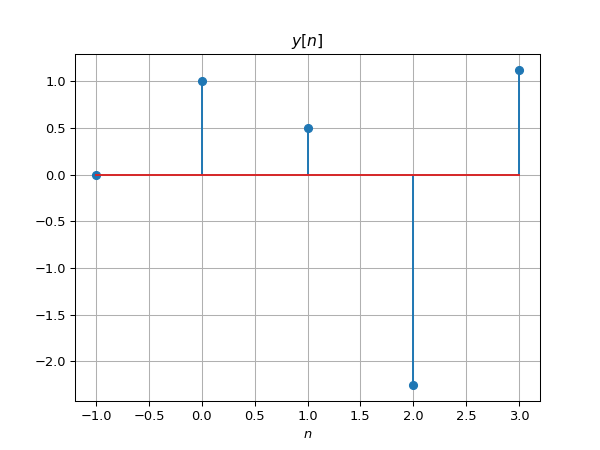

In [12]:
plt.stem(n,y,use_line_collection= True )
plt.title('$y[n]$')
plt.xlabel('$n$')
plt.grid()

## Calculating the output of a system whose impulse response is known

###  Calculating the convolution without using defined commands

In [18]:
import numpy as np
#x ve h ın konvolüsyon toplamı ile y işaretimizi bulalım

In [19]:
h=np.array([1,2,-1],dtype=float)
x=np.array([1,3], dtype=float)

In [20]:
# x ve h dizilerinin uzunluklarını tuttuk
M=len(h) 
N=len(x)
L=M+N-1
y=np.zeros([L]) 


In [21]:
for n in range (L):
    y[n]=0
    for k in range(N):     #program hata vermemesi için n-k nın negatif ve M den büyük değerleri için 0 a eşitledik
        if n-k<0 or n-k>=M: 
            h_n_k=0
        else: 
            h_n_k = h[n-k]
        y[n]=y[n]+x[k]*h_n_k
print(y)

[ 1.  5.  5. -3.]


###  Calculating the convolution using defined commands

In [22]:
import numpy as np
from scipy import signal as sig

In [23]:
h=np.array([1,2,-1],dtype=float)
x=np.array([1,3],dtype=float)

In [24]:
# concolve komutu ile otomatik olarak hesaplanabilir
print(np.convolve(x,h)) 
print(sig.convolve(x,h))

[ 1.  5.  5. -3.]
[ 1.  5.  5. -3.]


In [25]:
x=np.array([1,0,2,-1])
h=np.array([1,0,0,0,3])
y=np.convolve(x,h)
print(y)

[ 1  0  2 -1  3  0  6 -3]


<IPython.core.display.Javascript object>


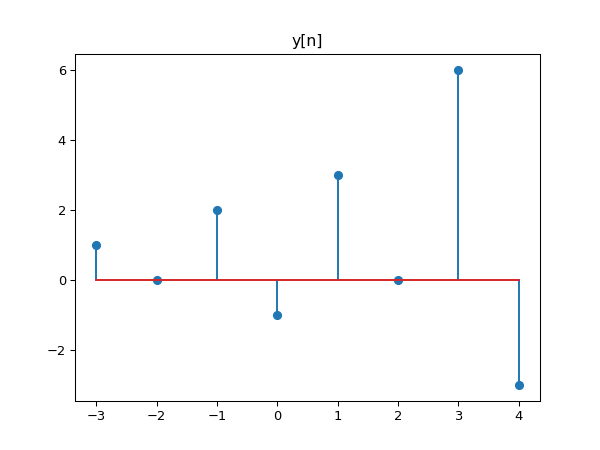

In [26]:
n=np.arange(-3,5) # başlangıç ve bitiş işaretlerinin ayrı ayrı konvolüsyonlarını aldık
plt.figure()
plt.stem(n,y,use_line_collection=True)
plt.title('y[n]')
plt.show()

## EXAMPLES:

## 1)

#### a-şıkkı)

In [27]:
# Sistemin dürtü cevabını bulmak için x[n]=𝛿[n] dersek sistem çıktımız y[n]=h[n] şeklinde yani dürtü cevabı olur
# y[n]=x[n]-x[n-1] sisteminde yukarıdaki değerlerimizi yerine koyarsak
# h[n]=𝛿[n]-𝛿[n-1] olarak dürtü cevabını bulmuş olduk

#### b-şıkkı) bu sistem kararlıdır çünkü

In [28]:
#∣x[n]∣<M dersek kararlı olabilmesi için ∣y[n]∣<N olması gerekmektedir
#∣x[n]∣<M olduğundan ∣x[n]-x[n-1]∣<M ı-olarak kabul edilebilir dolayısıyla
#∣y[n]∣=∣x[n]-x[n-1]∣<M sınırlı bir y işareti olduğunu kanıtladık. Sistemimiz kararlıdır
#ya da kararlılığı dürtü cevabından incelersek;
#h[n] değerimizin genliğinin sabit olduğu h[n]=𝛿[n]-𝛿[n-1] şekildeki gibi bellidir dolayısıyla kararlıdır diyebiliriz.


#### c-şıkkı)

In [29]:
import numpy as np
from scipy import signal as sig


In [30]:
n=np.arange(0,21)
h=np.array([1,-1],dtype=float)
x=np.zeros(len(n),dtype=float)

for i in range (len(n)):                            # iki periyot olacak şekilde x işaretimizi çizdirdik periyodunu N=10 bulduk.
    x[i]=np.cos(np.pi*i/5)
    



[ 1.         -0.19098301 -0.5        -0.61803399 -0.5        -0.19098301
  0.19098301  0.5         0.61803399  0.5         0.19098301 -0.19098301
 -0.5        -0.61803399 -0.5        -0.19098301  0.19098301  0.5
  0.61803399  0.5         0.19098301]


<IPython.core.display.Javascript object>


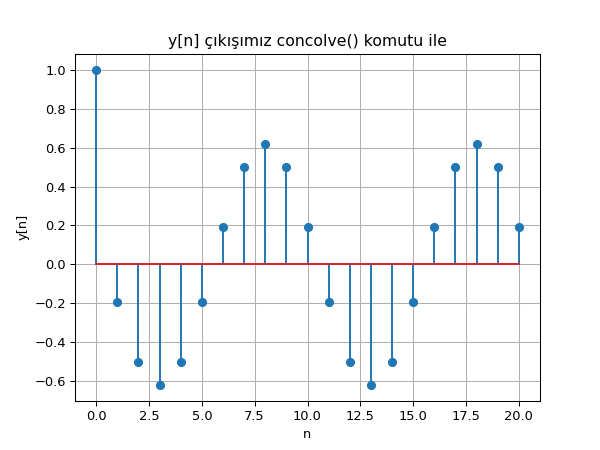

In [31]:
y=np.convolve(x,h,'same')                           #convolve() komutu ile sistem çıktımızı bulduk
print(y)
plt.figure()
plt.stem(n,y,use_line_collection=True)
plt.grid()
plt.title('y[n] çıkışımız concolve() komutu ile')
plt.ylabel('y[n]')
plt.xlabel('n')
plt.show()

<IPython.core.display.Javascript object>


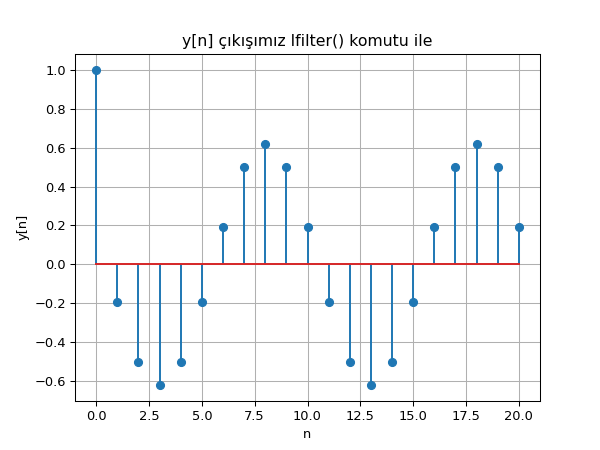

[ 1.         -0.19098301 -0.5        -0.61803399 -0.5        -0.19098301
  0.19098301  0.5         0.61803399  0.5         0.19098301 -0.19098301
 -0.5        -0.61803399 -0.5        -0.19098301  0.19098301  0.5
  0.61803399  0.5         0.19098301]


In [32]:

plt.figure()
b=[1,-1]
a=[1]
y1=sig.lfilter(b,a,x)                              #lfilter() komutu ile sistem çıktımızı bulduk
print(y1)
plt.stem(n,y1,use_line_collection=True)
plt.grid()
plt.title('y[n] çıkışımız lfilter() komutu ile')
plt.ylabel('y[n]')
plt.xlabel('n')
plt.show()


## 2)


### a-şıkkı)

<IPython.core.display.Javascript object>


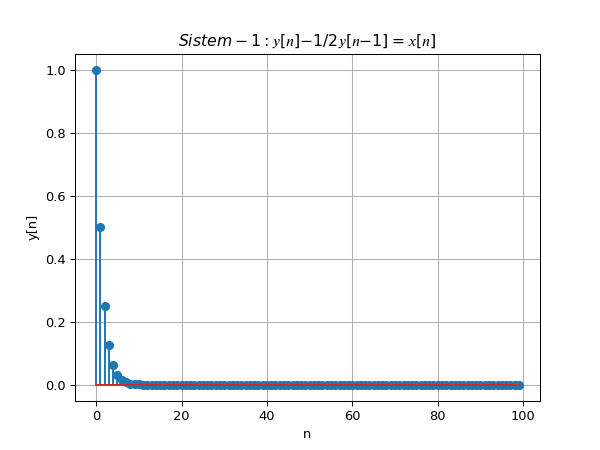

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

def u(n):               
    if n >= 0:
        return 1
    else:
        return 0
    
n=np.arange(0,100)
h=np.zeros(len(n),dtype=float)
x=np.zeros(len(n),dtype=float) # 100 birim olacak şekilde x e yer ayırdık

for i in range(len(n)): 
    x = u(i)


for i in range (len(n)):                           
    h[i]=2**-i


y=np.convolve(x,h,'same')                        
plt.figure()
plt.stem(n,y,use_line_collection=True)
plt.grid()
plt.title('$Sistem-1: 𝑦[𝑛] −1/2𝑦[𝑛 − 1] = 𝑥[𝑛]$')
plt.ylabel('y[n]')
plt.xlabel('n')
plt.show()

<IPython.core.display.Javascript object>


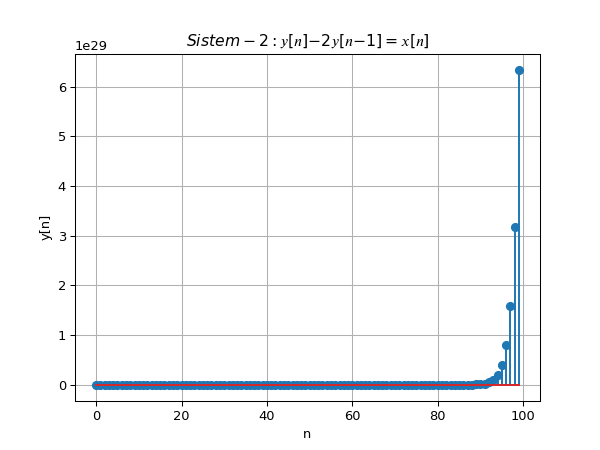

In [39]:

for i in range(len(n)): # x girişimizi 100 adet dürtü fonksiyonu olarak belirledik
    x = u(i)


for i in range (len(n)):      # el ile dürtü cevabını hesapladık                      
    h[i]=2**i


y=np.convolve(x,h,'same')    # dürtü cevabımız ile x işaretimizi konvolüsyon toplamından yararlanarak y çıkışımızı bulduk                   
plt.figure()
plt.stem(n,y,use_line_collection=True)
plt.grid()
plt.title('$ Sistem-2: 𝑦[𝑛] − 2𝑦[𝑛 − 1] = 𝑥[𝑛]$')
plt.ylabel('y[n]')
plt.xlabel('n')
plt.show()

### b-şıkkı)

In [40]:
# sadece grafiklere bakarak kararlılığı yorumlayacak olursak
# Sistem-1 için birim dürtü cevabı h[n]=2**-n olduğundan çıktıda da görüldüğü gibi maksimum bir değerinde sınırlı bir sinyaldir 
# dolayısıyla SİSTEM-1 KARARLIDIR

In [41]:
# sistem-2 için birim dürtü cevabı h[n]=2**n olduğundan sonsuza yaklaşır grafikte görüldüğü gibi sınırlı bir sistem değildir
#dolayısıyla SİSTEM-2 KARARLI DEĞİLDİR

### c-şıkkı)

In [42]:
# sistemlerin nedensel olabilmesi için h[n]=0 n<0 koşulunu sağlaması gerekmektedir.
# sistem-1 için h[n]=2**-n olduğundan n=-2 verirsek h[n]=2**2=4 çıkar koşul sağlanmadığından nedensel değildir.
# sistem-2 için h[n]=2**n olduğundan n=-2 verirsek h[n]=2**-2 =1/4 çıkar yukarıdaki koşul sağlanmadığından nedensel değildir.